## Importing The Necessary Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

- ##### Handling missing values

In [2]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [3]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**
     
     -   **3 -** Types of EVs:
    

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

-   Now let's analyze the distribution of the ***Types of EVs***:

In [5]:
df_evs_types = df.groupby('Electric Vehicle Type').size().reset_index(name='Count')

df_evs_types

,Electric Vehicle Type,Count
0,Battery Electric Vehicle (BEV),138947
1,Plug-in Hybrid Electric Vehicle (PHEV),38526


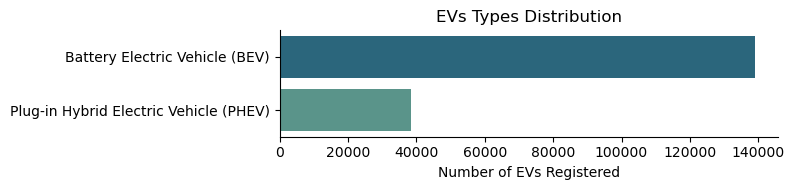

In [6]:
# plot the distribution of EVs types
plt.figure(figsize=(8, 2))

sns.barplot(y='Electric Vehicle Type', x='Count', data=df_evs_types, palette='crest_r')


plt.title('EVs Types Distribution')
plt.ylabel('')
plt.xlabel('Number of EVs Registered')
sns.despine()
plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Battery Electric Vehicles (BEVs)** lead with around 140,000

    -   **Plug-in Hybrid Electric Vehicles (PHEVs)** have about 50,000 registrations, indicating a significant but smaller share.

    

-   The chart suggests a stronger preference for fully electric vehicles over hybrids.